# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [49]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [50]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [51]:
# Your work here.
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns

# 1. Is the distribution of body temperatures normal? 

Mean: 98.249 degrees Fahrenheit.
Standard deviation: 0.73 degrees Fahrenheit.


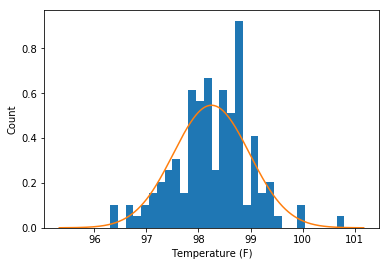

In [52]:
# Mean Temperature
mean_temp =np.mean(df.temperature)
print("Mean: "+str(np.round(mean_temp,3))+" degrees Fahrenheit.")

# Standard Deviation 
std_temp=np.std(df.temperature)
print("Standard deviation: "+str(np.round(std_temp,3))+" degrees Fahrenheit.")

x = np.linspace(mean_temp-4*std_temp,mean_temp+4*std_temp, 5000)
y_pdf = stats.norm.pdf(x,mean_temp,std_temp)
plt.hist(df.temperature, normed=True, bins=30)
plt.plot(x,y_pdf)
plt.xlabel('Temperature (F)')
plt.ylabel('Count')
plt.show()

This distribution looks to appear normally distributed but with a little scew towards the right. To confirm this i will have to compare it with ECDF

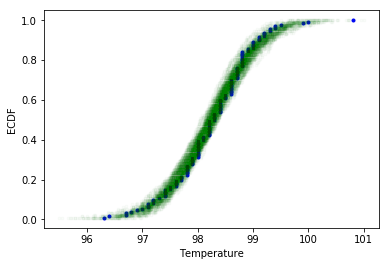

In [53]:
# Create an ecdf function
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

#Plotting ECDF for observed data
x, y = ecdf(df.temperature)
_ = plt.plot(x, y, marker = '.', linestyle = 'none', color = 'blue')

m, s, n = np.mean(df.temperature), np.std(df.temperature), len(df.temperature)
for i in range(100):
    simulation = np.random.normal(m, s, n)
    x, y = ecdf(simulation)
    _ = plt.plot(x, y, marker = '.', alpha = 0.02, linestyle = 'none', color = 'green')
_ = plt.xlabel('Temperature')
_ = plt.ylabel('ECDF')

After comparing EDCF comparisone, it looks like the data is normally distributed.. i.e normal distribution. This can be further confirmed by running normality test


In [54]:
#Assuming alpha = 0.05

alpha = 0.05
k2, p = stats.normaltest(df.temperature)
print('p = ' + str(p))

p = 0.2587479863488254


Since p < alpha.. In this case Null Hypothesis cannot be rejeced. Hence we can conclude that this is a aormal distribution

# 2. Is the sample size large? Are the observations independent? 

df.describe()

df.describe() indicated a total count of 130, which is higher than the prescribed sample size for Central Limit Theorem (CLT) i.e n>30, as well as 10% below human population, so it is safe to assume that the observations in this dataset are independent

# 3. Is the true population mean really 98.6 degrees F? 

A. Bootstrap Hypothesis test

Lets define our Hypothesis to test whether the population mean is really 98.6 degrees Fahrenheit, our null and alternative hypotheses can be written as such: $$H_0:\mu=98.6°F$$$$H_1: \mu\neq98.6°F$$

In [62]:
#Shifting data mean to match with population mean 98.6 degree F
t_shifted = df.temperature - np.mean(df.temperature) + 98.6
#Bootstrap the data 10000 times, and collect means.
bs_mean = np.empty(10000)
for i in range(10000):
    sample = np.random.choice(t_shifted, size = len(t_shifted))
    bs_mean[i] = np.mean(sample)
p = np.sum(abs(bs_mean-98.6) >= abs(np.mean(df.temperature)-98.6)) / len(bs_mean)
print('p = ' + str(p))

p = 0.0


p-value of bootstrap hypothesis test is 0.0 which is greater than alpha (p>alpha), indicates that the population mean of 98.6 °F is unlikely. Hence rejecting null Hypothesis

B. Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?

Since the sample size is greater than 30 (n > 30), normally distributed and we have only one sample mean, hence z-statistics should be used


In [60]:
#Calculating z-statistics
z = (np.mean(df.temperature) - 98.6) / np.sqrt(np.var(df.temperature) / len(df.temperature))

# Since it is a 2 tail test, multiple z-value by 2
p = stats.norm.cdf(z) * 2
print('z = {}\tp = {}'.format(z, p))

z = -5.475925202078116	p = 4.3523151658821886e-08


C. Now try using the other test. How is the result be different? Why?

In [61]:
#Runing the t-statistics
t, p = stats.ttest_1samp(df.temperature, 98.6)
print('t = {}\tp = {}'.format(t, p))

t = -5.4548232923645195	p = 2.4106320415561276e-07


# 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.

In [67]:
n = np.random.choice(df.temperature,10)

# z-statistics
z = (np.mean(n) - 98.6) / np.sqrt(np.var(n) / len(n))
p = stats.norm.cdf(z) * 2
print('z = {}\tp = {}'.format(z, p))

# t-statistics
t, p = stats.ttest_1samp(n, 98.6)
print('t = {}\tp = {}'.format(t, p))

z = -1.238369855110275	p = 0.21557895281405448
t = -1.1748207983523529	p = 0.27021207456302604


A. Which one is the correct one to use?

Since the sample size is small i.e 10, t- statistics will be the correct one to use

# 5. At what temperature should we consider someone's temperature to be "abnormal"? 

In [73]:
#Use the bootstrap approach first
n = np.random.choice(df.temperature, 100000)
i =  np.percentile(n, [2.5, 97.5])
print('Using bootstrap approach,')
print('95% confidence interval is between {} and {} degrees.'.format(i[0], i[1]))
print('margin of error is {:.1f} degrees.'.format((i[1]-i[0])/2))

#Use frequetist approach
k = stats.norm.interval(0.95, np.mean(df.temperature), np.std(df.temperature))
print('Using frequentist approach,')
print('95% confidence interval is between {:.1f} and {:.1f} degrees.'.format(k[0], k[1]))
print('margin of error is {:.1f} degrees.'.format((k[1]-k[0])/2))

Using bootstrap approach,
95% confidence interval is between 96.7 and 99.5 degrees.
margin of error is 1.4 degrees.
Using frequentist approach,
95% confidence interval is between 96.8 and 99.7 degrees.
margin of error is 1.4 degrees.


# 6. Is there a significant difference between males and females in normal temperature? 

Our sample size for our sampling distribution of male body temperatures is 65.
Our sample size for our sampling distribution of female body temperatures is 65.


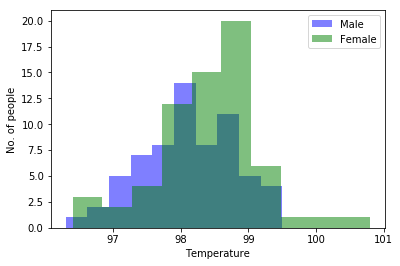

In [83]:
male=df[df.gender=='M'].temperature
female=df[df.gender=='F'].temperature
male_n=len(male)
female_n=len(female)
print("Our sample size for our sampling distribution of male body temperatures is "+str(male_n)+".")
print("Our sample size for our sampling distribution of female body temperatures is "+str(female_n)+".")

# Plotting a histograph for Male and Female data
_ = plt.hist(male, color = 'blue', alpha = 0.5)
_ = plt.hist(female, color = 'green', alpha = 0.5)
_ = plt.xlabel('Temperature')
_ = plt.ylabel('No. of people')
_ = plt.legend(['Male', 'Female'])

In [86]:
#Run two sample t test, because sample sizes have been split between male and female and hence the overall sample size is small 
t, p = stats.ttest_ind(male, female)
print('t = {}\tp = {}'.format(t, p))

alpha = 0.05
if p < alpha:
    print('Null hypothesis rejectd. Temperatures of male and female are probably different.')
else:
    print('Null hypothesis cannot be rejected. Temperatures of male and female are probably the same.')

t = -2.2854345381656103	p = 0.02393188312239561
Null hypothesis rejectd. Temperatures of male and female are probably different.
